In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.getcwd()

'C:\\Users\\MAVERICK\\OneDrive\\Desktop\\Competition\\Analytics Vidhya competion 2'

In [3]:
# Train Data
train=pd.read_csv('train_wn75k28.csv')


In [4]:
# Test Data
test=pd.read_csv('test_Wf7sxXF.csv')

In [5]:
# Concating Both the data
df = pd.concat([test.assign(ind="test"), train.assign(ind="train")])

In [6]:
df

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,ind,buy
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,test,NaN
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,test,NaN
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0,test,NaN
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0,test,NaN
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0,test,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,train,0.0
39157,39158,2021-12-31,3,9,3.0,NaN,0,0,0,0,0,0,0,0,0,0,0,0,train,0.0
39158,39159,2021-12-31,8,7,2.0,NaN,1,0,0,0,1,0,1,0,0,0,0,0,train,0.0
39159,39160,2021-12-31,7,12,2.0,NaN,0,0,0,0,0,1,0,0,0,0,1,0,train,0.0


In [7]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      29047
signup_date             21762
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
ind                         0
buy                     13184
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52345 entries, 0 to 39160
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    52345 non-null  int64  
 1   created_at            52345 non-null  object 
 2   campaign_var_1        52345 non-null  int64  
 3   campaign_var_2        52345 non-null  int64  
 4   products_purchased    23298 non-null  float64
 5   signup_date           30583 non-null  object 
 6   user_activity_var_1   52345 non-null  int64  
 7   user_activity_var_2   52345 non-null  int64  
 8   user_activity_var_3   52345 non-null  int64  
 9   user_activity_var_4   52345 non-null  int64  
 10  user_activity_var_5   52345 non-null  int64  
 11  user_activity_var_6   52345 non-null  int64  
 12  user_activity_var_7   52345 non-null  int64  
 13  user_activity_var_8   52345 non-null  int64  
 14  user_activity_var_9   52345 non-null  int64  
 15  user_activity_var_1

In [9]:
df.id.value_counts()

39162    1
21718    1
21708    1
21709    1
21710    1
        ..
4268     1
4269     1
4270     1
4271     1
39161    1
Name: id, Length: 52345, dtype: int64

### treating the null values in 'products_purchased'

In [10]:
df_pp=df.pivot_table(values='products_purchased',index=['created_at'],aggfunc=np.median)
df_pp

,products_purchased
created_at,
2021-01-01,2.0
2021-01-02,2.0
2021-01-03,2.0
2021-01-04,2.0
2021-01-05,3.0
...,...
2022-03-26,2.0
2022-03-27,2.0
2022-03-28,2.0


In [11]:
bool_pp=df.products_purchased.isnull()
bool_pp

0         True
1        False
2         True
3        False
4        False
         ...  
39156    False
39157    False
39158    False
39159    False
39160     True
Name: products_purchased, Length: 52345, dtype: bool

In [12]:
df.loc[bool_pp,'products_purchased']=df.loc[bool_pp,'created_at'].apply(lambda x: df_pp.loc[x])

In [13]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date             21762
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
ind                         0
buy                     13184
dtype: int64

### treating the null values in 'signup_date'

In [14]:
from scipy.stats import mode

In [15]:
df.signup_date.value_counts()

2022-03-06    55
2021-07-18    51
2022-03-20    51
2022-03-10    51
2022-03-27    50
              ..
2017-07-20     1
2015-02-07     1
2015-12-07     1
2017-11-09     1
2017-10-19     1
Name: signup_date, Length: 1819, dtype: int64

In [16]:
df_sd=df.pivot_table(index='created_at',values='signup_date',aggfunc=lambda x:mode(x).mode[0])
df_sd

,signup_date
created_at,
2021-01-01,2021-10-20
2021-01-02,2021-02-06
2021-01-03,2021-05-25
2021-01-04,2021-04-06
2021-01-05,2021-01-03
...,...
2022-03-26,2022-03-06
2022-03-27,2022-03-01
2022-03-28,2021-06-05


In [17]:
bool_sd=df.signup_date.isnull()
bool_sd

0        False
1        False
2         True
3        False
4        False
         ...  
39156    False
39157     True
39158     True
39159     True
39160    False
Name: signup_date, Length: 52345, dtype: bool

In [18]:
df.loc[bool_sd,'signup_date']=df.loc[bool_sd,'created_at'].apply(lambda x: df_sd.loc[x])

In [19]:
df.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased          0
signup_date                 0
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
ind                         0
buy                     13184
dtype: int64

In [20]:
df.signup_date.value_counts()

2022-02-11    294
2022-03-06    291
2022-02-25    281
2022-01-25    254
2021-07-18    254
             ... 
2015-11-04      1
2017-07-28      1
2016-09-07      1
2015-02-07      1
2017-10-19      1
Name: signup_date, Length: 1819, dtype: int64

### Feature Engineering

In [21]:
df.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'ind', 'buy'],
      dtype='object')

In [22]:
# Creating a new feature as 'User_Activity'

df['user_activity']= df['user_activity_var_1']+df['user_activity_var_2']+ df['user_activity_var_3']+ df['user_activity_var_4']+df['user_activity_var_5']+ df['user_activity_var_6']+ df['user_activity_var_7']+df['user_activity_var_8']+ df['user_activity_var_9']+df['user_activity_var_10']+df['user_activity_var_11']+df['user_activity_var_12']

In [23]:
df.user_activity.value_counts()

2    21397
1    16026
3     9661
0     2864
4     1970
5      336
6       68
7       18
8        5
Name: user_activity, dtype: int64

In [24]:
# binning the 'User_activity' feature as per number of activities

df['user_activity']=pd.cut(df.user_activity,bins=[-1,0,5,8],
                      labels=['No activity','Moderate active','High active'])

In [25]:
df['user_activity'].value_counts()

Moderate active    49390
No activity         2864
High active           91
Name: user_activity, dtype: int64

In [26]:
# Manual Label Encoding

df['user_activity']=df.user_activity.replace(to_replace=['No activity','Moderate active','High active'],value=[0,1,2])
df['user_activity'].value_counts()

1    49390
0     2864
2       91
Name: user_activity, dtype: int64

<AxesSubplot:>

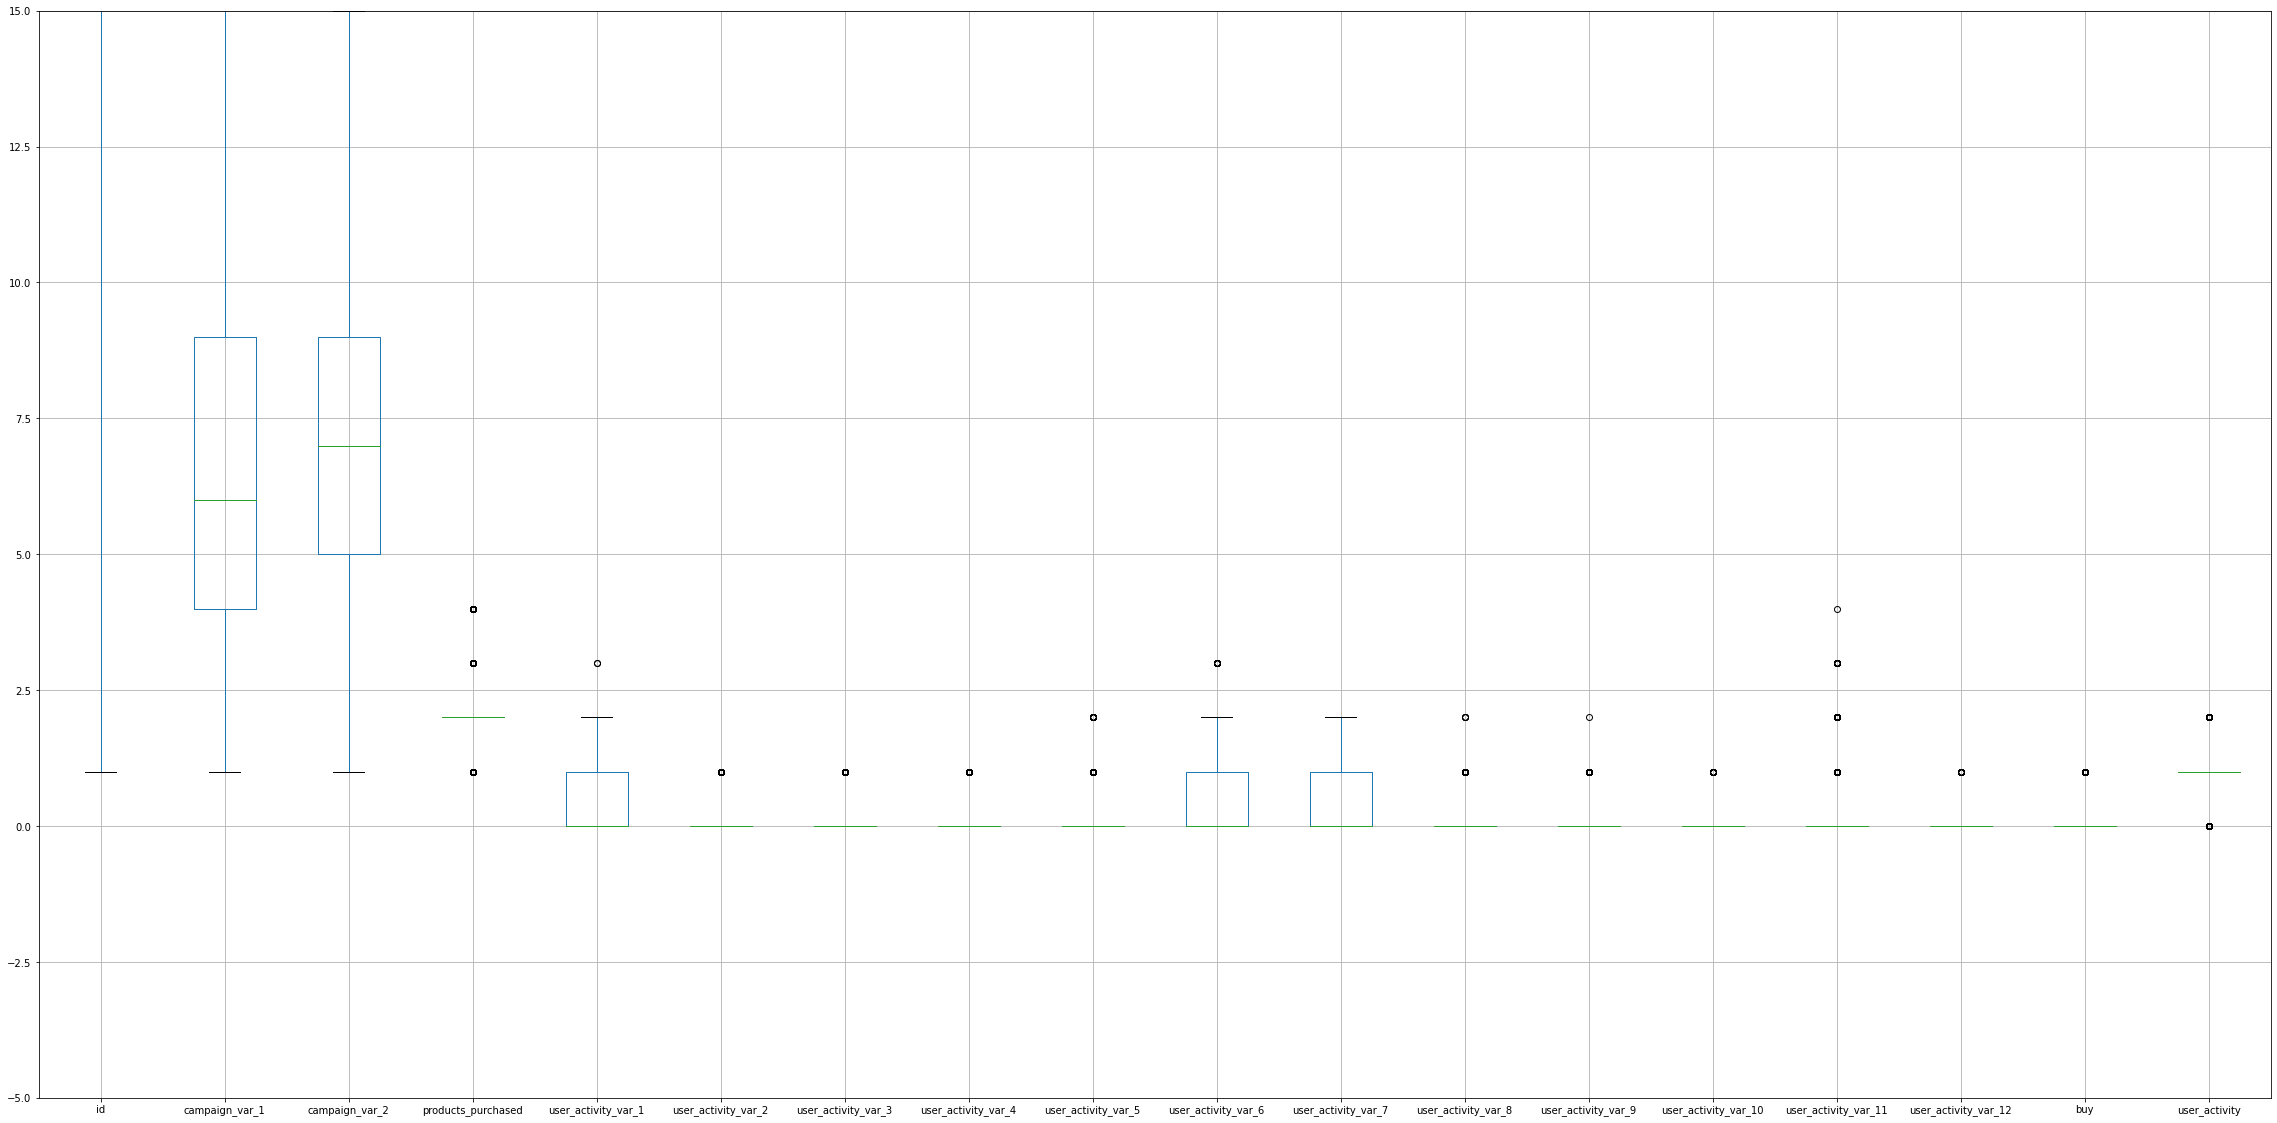

In [27]:
# checking the outliers

plt.figure(figsize=(40,20))
plt.ylim(-5,15)
df.boxplot()

In [28]:
df.describe()

,id,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,user_activity
count,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,52345.000000,39161.000000,52345.000000
mean,26173.000000,6.826211,6.828198,2.067151,0.396714,0.006094,0.102952,0.010373,0.151896,0.506295,0.291107,0.166434,0.010679,0.000344,0.227624,0.000478,0.051020,0.947025
std,15110.844257,3.543873,2.711333,0.528222,0.508333,0.077828,0.303899,0.101322,0.359933,0.560053,0.457671,0.372679,0.102973,0.018541,0.439849,0.021849,0.220042,0.231618
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13087.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,26173.000000,6.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,39259.000000,9.000000,9.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,52345.000000,16.000000,15.000000,4.000000,3.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000,1.000000,4.000000,1.000000,1.000000,2.000000


In [29]:
from datetime import datetime

In [30]:
df['created_at']= pd.to_datetime(df['created_at']) 
df['signup_date']= pd.to_datetime(df['signup_date']) 

#### Feature Engineering

df['Active Days']=df['created_at']-df['signup_date']
#df['Active Days']=df['Active Days'].split(' ')

df['Active Days']=df['Active Days'].astype('object')

df['Active Days']=df['Active Days'].str.split(' ')

for i in df['Active Days']:
    print(i)

C:\Users\MAVERICK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAVERICK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MAVERICK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an

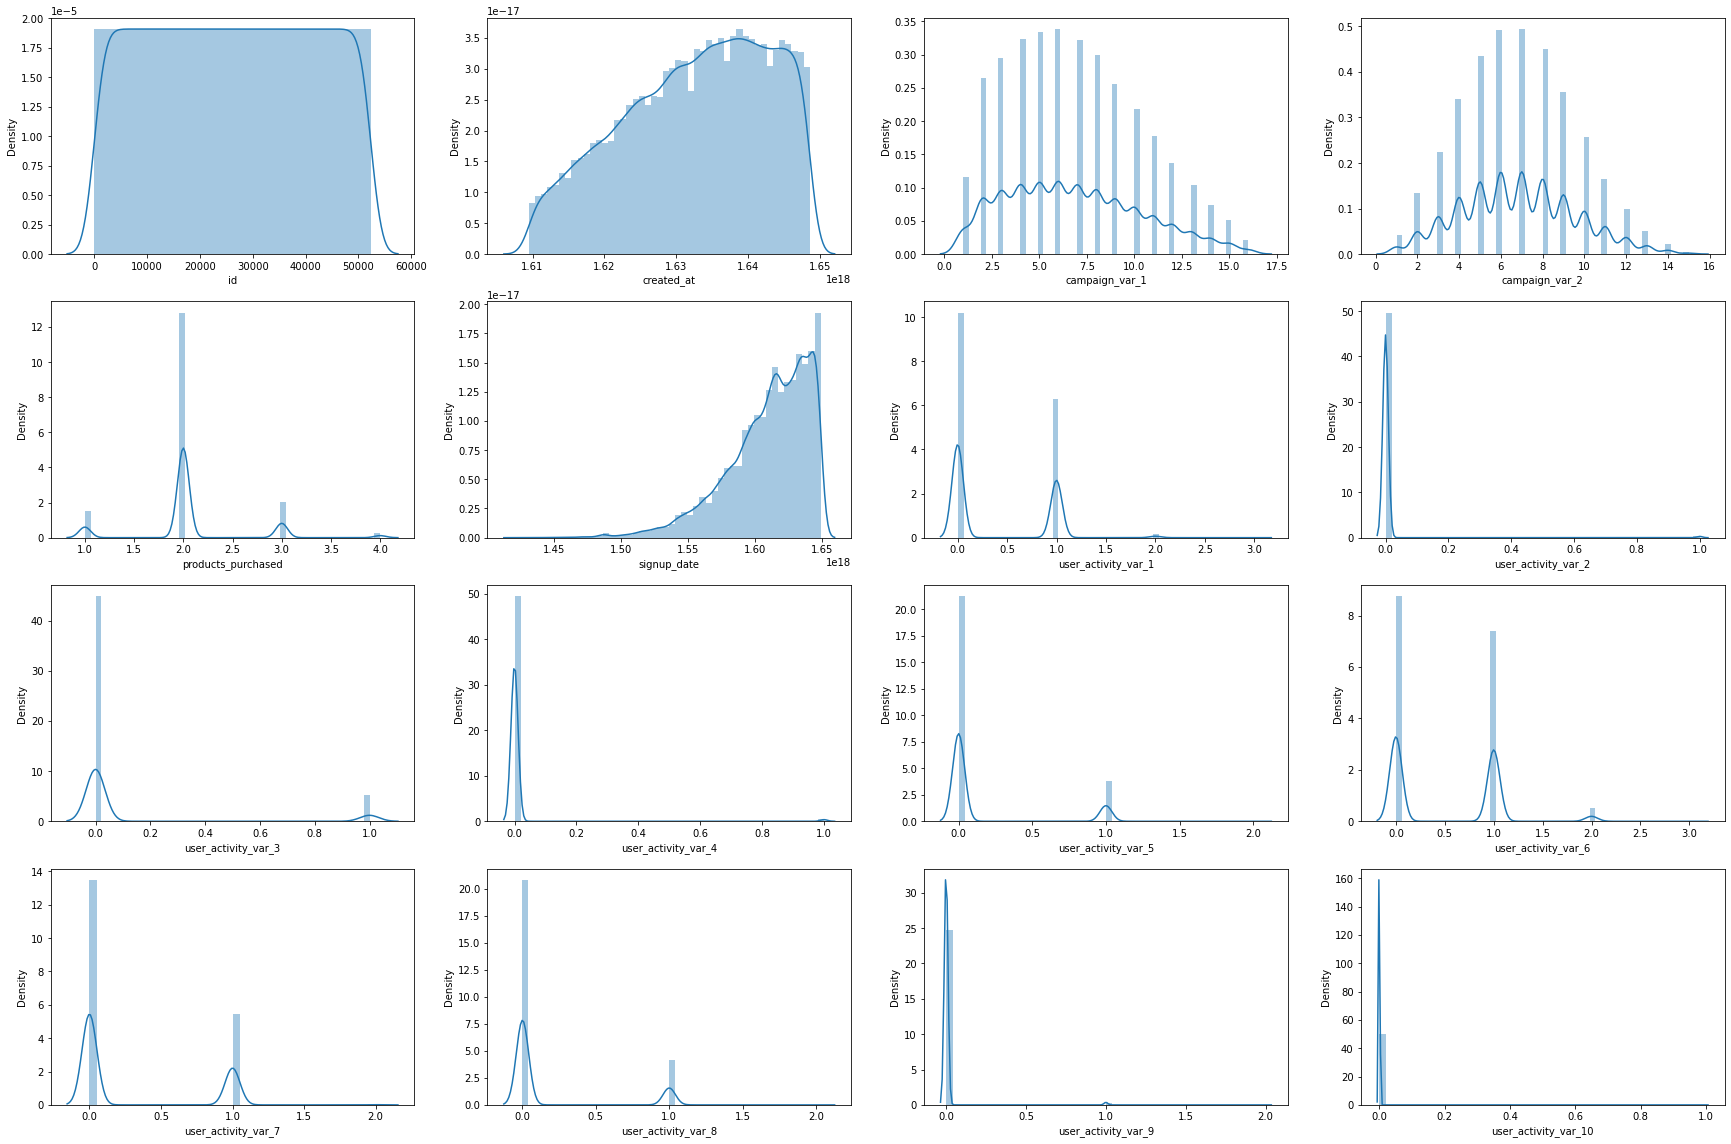

In [31]:
# Checking the Skewness in the data

fig,ax=plt.subplots(nrows=4,ncols=4,figsize=(30,20))
for i,subplot in zip(df,ax.flatten()):
    sns.distplot(df[i],kde=True,ax=subplot)

Conclusion- From the above we can understand that 'created_at' and 'signup_date' are left skewed and can be Treated or dropped

<AxesSubplot:>

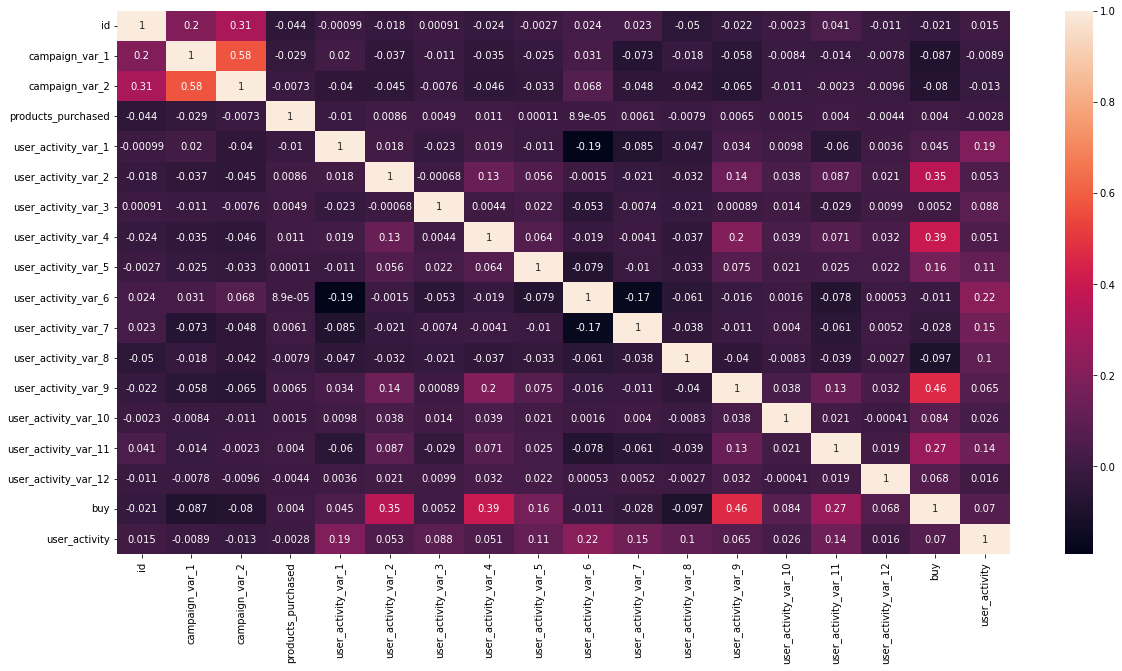

In [32]:
# Checking for Correlation 

fig=plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

conclusion- Non of the features are correlated with each other,that means non are Multicollinear

### Checking for VIF

In [33]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

In [34]:
x=df.drop(['buy','ind','created_at','signup_date'],axis=1)
df_vif=pd.DataFrame()
df_vif['feature']=x.columns
df_vif['VIF']=[VIF(x.values,i) for i in range(len(x.columns))]
df_vif.sort_values('VIF',ascending=False)

,feature,VIF
16,user_activity,16.672633
2,campaign_var_2,11.228576
3,products_purchased,10.052188
1,campaign_var_1,7.017473
0,id,4.337921
9,user_activity_var_6,2.351811
4,user_activity_var_1,1.937460
10,user_activity_var_7,1.627551
14,user_activity_var_11,1.404116
11,user_activity_var_8,1.270546


In [35]:
# As from the above we can see that the VIF for 'campaign_var_2' is more than 5 hence we can drop it or treat it

### Splitting the Train and Test data

In [36]:
df_train_f=df[~df['buy'].isnull()]
train=df_train_f
train.drop('ind',axis=1,inplace=True)

df_test_f=df[df['buy'].isnull()]
test=df_test_f.drop(['buy','ind'],axis=1)

C:\Users\MAVERICK\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Model building with Train Data

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV

In [38]:
train.columns

Index(['id', 'created_at', 'campaign_var_1', 'campaign_var_2',
       'products_purchased', 'signup_date', 'user_activity_var_1',
       'user_activity_var_2', 'user_activity_var_3', 'user_activity_var_4',
       'user_activity_var_5', 'user_activity_var_6', 'user_activity_var_7',
       'user_activity_var_8', 'user_activity_var_9', 'user_activity_var_10',
       'user_activity_var_11', 'user_activity_var_12', 'buy', 'user_activity'],
      dtype='object')

#### Applying Smote to Standardize the data 

In [39]:
from imblearn.over_sampling import SMOTE

x=train.drop(['created_at','signup_date','buy'],axis=1)
y=train['buy']

smote=SMOTE()

x_resamp,y_resamp=smote.fit_resample(x,y.ravel())

x_train,x_test,y_train,y_test=train_test_split(x_resamp,y_resamp,test_size=0.25,random_state=100)

#### Standard Scaling

In [40]:
sc=StandardScaler()
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [41]:
lr1=LogisticRegression()

lr1.fit(x_train_sc,y_train)

train_pred=lr1.predict(x_train_sc)

test_pred=lr1.predict(x_test_sc)

print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81     27907
         1.0       0.80      0.83      0.81     27837

    accuracy                           0.81     55744
   macro avg       0.81      0.81      0.81     55744
weighted avg       0.81      0.81      0.81     55744

              precision    recall  f1-score   support

         0.0       0.82      0.80      0.81      9256
         1.0       0.81      0.83      0.82      9326

    accuracy                           0.81     18582
   macro avg       0.81      0.81      0.81     18582
weighted avg       0.81      0.81      0.81     18582



In [42]:
log_accuracy = accuracy_score(y_test,test_pred)
print('log_smote_acc',log_accuracy) 

log_f1_score=f1_score(y_test,test_pred)
print('log_f1_score',log_f1_score)

log_smote_acc 0.8136906683887634
log_f1_score 0.8163784873236449


## Random Forest Base_Model

In [43]:
from sklearn.ensemble import RandomForestClassifier

In [44]:
RFC=RandomForestClassifier(n_estimators=300,n_jobs=-1,oob_score=True,random_state=100)

RFC.fit(x_train_sc,y_train)

RandomForestClassifier(n_estimators=300, n_jobs=-1, oob_score=True,
                       random_state=100)

In [45]:
train_pred=RFC.predict(x_train_sc)

In [46]:
test_pred=RFC.predict(x_test_sc)

In [47]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27907
         1.0       1.00      1.00      1.00     27837

    accuracy                           1.00     55744
   macro avg       1.00      1.00      1.00     55744
weighted avg       1.00      1.00      1.00     55744

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.94      9256
         1.0       0.93      0.94      0.94      9326

    accuracy                           0.94     18582
   macro avg       0.94      0.94      0.94     18582
weighted avg       0.94      0.94      0.94     18582



In [48]:
RFC_accuracy = accuracy_score(y_test,test_pred)
print('RFC_acc',RFC_accuracy) 

RFC_f1_score=f1_score(y_test,test_pred)
print('RFC_f1_score',RFC_f1_score)   

RFC_acc 0.9364438704122269
RFC_f1_score 0.9371841923301951


## Random Forest using GridSearch CV

In [49]:
params={ 'max_depth':[5,10,15],'max_features': [6, 8, 10],'n_estimators':[50,100,150]}
gs_RFC=GridSearchCV(estimator=RFC, param_grid=params, cv=5, n_jobs=-1,scoring ='accuracy')


In [50]:
# Fitting the Model
gs_RFC.fit(x_train_sc,y_train)

#best Estimator
grid_RFC=gs_RFC.best_estimator_
grid_RFC

RandomForestClassifier(max_depth=15, max_features=10, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=100)

In [51]:
# Fitting the train data
grid_RFC.fit(x_train_sc,y_train)

RandomForestClassifier(max_depth=15, max_features=10, n_estimators=150,
                       n_jobs=-1, oob_score=True, random_state=100)

In [52]:
# Model Predict
train_pred=grid_RFC.predict(x_train_sc)
test_pred=grid_RFC.predict(x_test_sc)


In [53]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92     27907
         1.0       0.92      0.91      0.92     27837

    accuracy                           0.92     55744
   macro avg       0.92      0.92      0.92     55744
weighted avg       0.92      0.92      0.92     55744

              precision    recall  f1-score   support

         0.0       0.89      0.91      0.90      9256
         1.0       0.91      0.89      0.90      9326

    accuracy                           0.90     18582
   macro avg       0.90      0.90      0.90     18582
weighted avg       0.90      0.90      0.90     18582



In [54]:
RFC_Grid_accuracy = accuracy_score(y_test,test_pred)
print('RFC_Grid_acc',RFC_Grid_accuracy) 

RFC_Grid_f1_score=f1_score(y_test,test_pred)
print('RFC_Grid_f1_score',RFC_Grid_f1_score)

RFC_Grid_acc 0.9030782477666559
RFC_Grid_f1_score 0.9024746845724807


## XGboost Base_Model

In [55]:
from xgboost import XGBClassifier

In [56]:
xgb=XGBClassifier(objective='reg:logistic',use_label_encoder =False)

In [57]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='reg:logistic', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [58]:
train_pred=xgb.predict(x_train)

In [59]:
test_pred=xgb.predict(x_test)

In [60]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93     27907
         1.0       0.94      0.93      0.93     27837

    accuracy                           0.93     55744
   macro avg       0.93      0.93      0.93     55744
weighted avg       0.93      0.93      0.93     55744

              precision    recall  f1-score   support

         0.0       0.91      0.93      0.92      9256
         1.0       0.93      0.91      0.92      9326

    accuracy                           0.92     18582
   macro avg       0.92      0.92      0.92     18582
weighted avg       0.92      0.92      0.92     18582



In [61]:
XG_accuracy = accuracy_score(y_test,test_pred)
print('XG_acc',XG_accuracy) 

XG_f1_score=f1_score(y_test,test_pred)
print('XG_f1_score',XG_f1_score)

XG_acc 0.9230976213539985
XG_f1_score 0.9225935756459563


## XGBoost Using Grid Search CV

In [62]:
params={ 'max_depth':[5,10,15],'max_features': [6, 8, 10],'n_estimators':[50,100,150]}
gs_XGB=GridSearchCV(estimator=xgb, param_grid=params, cv=5, n_jobs=-1,scoring ='accuracy')

In [63]:
# Fitting the Model
gs_XGB.fit(x_train,y_train)

#best Estimator
grid_XGB_best=gs_XGB.best_estimator_
grid_XGB_best

[20:06:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, max_features=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1,
              objective='reg:logistic', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [64]:
# Fitting the Model
grid_XGB_best.fit(x_train,y_train)

[20:06:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "max_features" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=15, max_features=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=150, n_jobs=8, num_parallel_tree=1,
              objective='reg:logistic', predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, ...)

In [65]:
# Model Predict
train_pred=grid_XGB_best.predict(x_train)
test_pred=grid_XGB_best.predict(x_test)

In [66]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     27907
         1.0       1.00      1.00      1.00     27837

    accuracy                           1.00     55744
   macro avg       1.00      1.00      1.00     55744
weighted avg       1.00      1.00      1.00     55744

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97      9256
         1.0       0.96      0.97      0.97      9326

    accuracy                           0.97     18582
   macro avg       0.97      0.97      0.97     18582
weighted avg       0.97      0.97      0.97     18582



In [67]:
XG_Grid_accuracy = accuracy_score(y_test,test_pred)
print('XG_Grid_acc',XG_Grid_accuracy) 

XG_Grid_f1_score=f1_score(y_test,test_pred)
print('XG_Grid_f1_score',XG_Grid_f1_score)

XG_Grid_acc 0.9655042514261113
XG_Grid_f1_score 0.965844301166942


## AdaBoost

In [68]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [69]:
ada.fit(x_train_sc,y_train)

train_pred=ada.predict(x_train_sc)

test_pred=ada.predict(x_test_sc)

In [70]:
print(classification_report(y_train,train_pred))
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     27907
         1.0       0.89      0.85      0.87     27837

    accuracy                           0.87     55744
   macro avg       0.88      0.87      0.87     55744
weighted avg       0.88      0.87      0.87     55744

              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      9256
         1.0       0.89      0.85      0.87      9326

    accuracy                           0.88     18582
   macro avg       0.88      0.88      0.88     18582
weighted avg       0.88      0.88      0.88     18582



In [71]:
Ada_accuracy = accuracy_score(y_test,test_pred)
print('Ada_acc',Ada_accuracy) 

Ada_f1_score=f1_score(y_test,test_pred)
print('Ada_f1_score',Ada_f1_score)

Ada_acc 0.8750941771606932
Ada_f1_score 0.8726195049667965


## Tabulate the performance metrics

In [72]:
models_Accuracy_df=pd.DataFrame({'Classification Model':['Logistic Regression','Random Forest Base','Random Forest using GridSearchCV','XGBoost Base','XGBoost using GridSearchCV','AdaBoost'],
                               'Accuracy':[ log_accuracy,  RFC_accuracy, RFC_Grid_accuracy, XG_accuracy, XG_Grid_accuracy,Ada_accuracy],
                                'f1 Score':[log_f1_score,RFC_f1_score,RFC_Grid_f1_score,XG_f1_score,XG_Grid_f1_score,Ada_f1_score]})
models_Accuracy_df

,Classification Model,Accuracy,f1 Score
0,Logistic Regression,0.813691,0.816378
1,Random Forest Base,0.936444,0.937184
2,Random Forest using GridSearchCV,0.903078,0.902475
3,XGBoost Base,0.923098,0.922594
4,XGBoost using GridSearchCV,0.965504,0.965844
5,AdaBoost,0.875094,0.872620


# Test Data 

In [73]:
test

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,user_activity
0,39162,2022-01-01,2,2,2.0,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0,1
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0,1
2,39164,2022-01-01,8,7,2.0,2021-09-26,0,0,0,0,1,1,0,0,0,0,0,0,1
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0,1
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13179,52341,2022-03-30,16,12,2.0,2022-01-24,0,0,0,0,0,1,1,0,0,0,0,0,1
13180,52342,2022-03-30,12,8,2.0,2022-03-19,1,0,0,0,0,1,0,0,0,0,0,0,1
13181,52343,2022-03-30,14,14,3.0,2021-08-15,0,0,1,0,0,0,1,0,0,0,0,0,1
13182,52344,2022-03-30,14,10,2.0,2022-01-24,0,0,0,0,0,0,1,0,0,0,1,0,1


In [74]:
# Original x_train and y_train

x=train.drop(['created_at','signup_date','buy'],axis=1)
y=train['buy']




In [75]:
x.shape,test.shape

((39161, 17), (13184, 19))

In [76]:
#Best test Prediction with Best Model trained with full trained data
test_f=test.drop(['created_at','signup_date'],axis=1)

#fitting the model with full train data
grid_RFC.fit(x,y)

#predicting the model with full test data
best_pred=grid_RFC.predict(test_f)


test['buy']=best_pred
test

submission_files=pd.DataFrame()
submission_files['id']=test.loc[:,"id"]
submission_files["buy"]=test.loc[:,"buy"]
submission_files

submission_files =submission_files.reset_index(drop=True)
submission_files



,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0
...,...,...
13179,52341,0.0
13180,52342,0.0
13181,52343,0.0
13182,52344,0.0


In [77]:
#converting to csv file format
submission_files.to_csv('Smart_4.csv', index = False)

In [78]:
pd.read_csv('Smart_4.csv')

,id,buy
0,39162,1.0
1,39163,0.0
2,39164,0.0
3,39165,1.0
4,39166,0.0
...,...,...
13179,52341,0.0
13180,52342,0.0
13181,52343,0.0
13182,52344,0.0
